#  ATOC5860 Application Lab #2 - AR1_Nstar
##### Originally coded by Prof. Kay (CU) and Elizabeth Maroon (CU, now U.Wisc) with input from Hannah Zanowski (CU, now U.Wisc)
##### last updated February 10, 2023

### LEARNING GOALS:
1) Calculate the autocorrelation at a range of lags using two methods available in python (np.correlate, dot products)
2) Estimate the effective sample size (N*) using the lag-1 autocorrelation
3) Evaluate the influence of changing the sampling frequency and the specified weather variable on the memory/redness of the data as quantified by the autocorrelation and N*.


### DATA and UNDERLYING SCIENCE MOTIVATION:  
In this notebook, you will analyze the memory (red noise) in weather observations from Fort Colins, Colorado at Christman Field.  The observations are from one year, but are sampled hourly. The default settings for the notebook analyze the air temperature in degrees F sampled once daily (every midnight).  But other standard weather variables and sampling frequencies can also be easily analyzed.  The file containing the data is called **christman_2016.csv** and it is a comma-delimited text file.


### Non-exhaustive Questions to guide your analysis:  

1) Start with the default settings in the code.  In other words – Read in the data and find the air temperature every 24 hours (every midnight) over the entire year.  Calculate the lag-1 autocorrelation using np.correlate and the direct method using dot products.  Compare the python syntax for calculating the autocorrelation with the formulas in Barnes.  Equation numbers are provided to refer you back to the Barnes Notes. What is the lag-1 autocorrelation?  

2) Calculate the autocorrelation at a range of lags using np.correlate and the direct method using dot products.  Compare the python syntax for calculating the autocorrelation with the formulas in Barnes.  Equation numbers are provided to refer you back to the Barnes Notes. How does the autocorrelation change as you vary the lag from -40 days to +40 days?

3) Calculate the effective sample size (N*) and compare it to your original sample size (N). Equation numbers are provided to refer you back to the Barnes Notes.  How much memory is there in temperature sampled every midnight?

4) Now you are ready to tinker … i.e., make minor adjustments to the code with the parameters set in the code to see how your results change.  Suggestion: Make a copy of the notebook for your tinkering so that you can refer back to your original answers and the unmodified original code. For example: Repeat steps 1-3) above with a different variable (e.g., relative humidity (RH), wind speed (wind_mph)).  Repeat steps 1-3) above with a different temporal sampling frequency (e.g., every 12 hours, every 6 hours, every 4 days).  How do you answers change?  

In [2]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import xarray
import pandas as pd   ##pandas reads in .csv.
from scipy import stats
import seaborn as sns  ### seaborn just makes things pretty -- no new typing
sns.set_style('whitegrid')  ###  change away from grey grid (seaborn default) to white grid

In [3]:
## Read in the data
filename = 'christman_2016.csv'
data=pd.read_csv(filename,sep=',')
data.head()

,day,hour,temp_F,RH,dewtemp_F,wind_mph,wind_dir,windgust,windgust_dir,pres_Hg,SOLIN_Wm2,Prec_inches
0,42370,0.000000,7.0,72.2,-0.1,1.2,234,3.9,224,851.30,0.0,0.0
1,42370,0.041667,5.4,74.3,-1.0,3.4,299,7.1,302,850.82,0.0,0.0
2,42370,0.083333,6.4,73.8,-0.2,2.8,200,7.0,301,849.83,0.0,0.0
3,42370,0.125000,3.0,73.5,-3.6,2.9,309,6.1,349,850.69,0.0,0.0
4,42370,0.166667,3.7,76.9,-1.9,3.1,346,5.3,255,848.24,0.0,0.0


minimum data value:  -14.3
maximum data value:  80.1


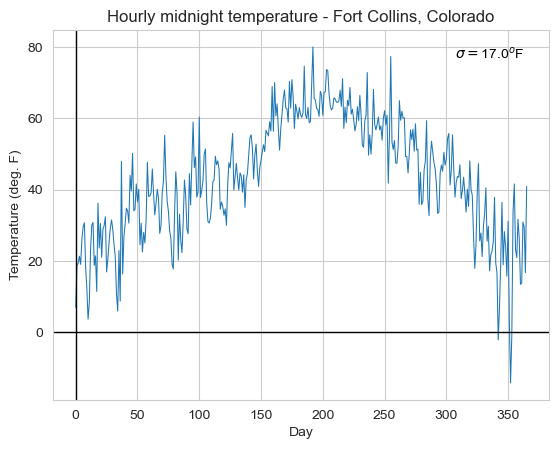

In [5]:
## Plot midnight temperature data for Fort Collins, Colorado
X=data['temp_F']
X_daily=X[::24] ## sample the hourly data every 24 hours
print('minimum data value: ',X_daily.min())
print('maximum data value: ',X_daily.max())
xindex = (np.arange(0,np.size(X),1))/24.
xindex_daily=xindex[::24] ## sample the index every 24 hours
plt.plot(xindex_daily, X_daily, linewidth = 0.75)
v = np.std(X_daily) #std dev
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v)) + '$^o$F', ha='right', transform=plt.gca().transAxes, color = 'k')
ymin, ymax = plt.ylim();
xmin, xmax = plt.xlim();
lines = plt.plot((xmin, xmax),(0, 0),(0, 0),(ymin, ymax));
plt.setp(lines,color='black', linewidth=1);
plt.ylim((ymin, ymax));
plt.xlim((xmin, xmax));
plt.ylabel('Temperature (deg. F)');
plt.xlabel('Day');
plt.title('Hourly midnight temperature - Fort Collins, Colorado');

In [23]:
arr = [1,2,3,4,5,6]
print(arr[0:-1*2])
print(arr[2:])

[1, 2, 3, 4]
[3, 4, 5, 6]


In [16]:
#Find the lag-one autocorrelation (AR1)
tseries=X_daily
sigma=np.std(tseries)  ## calculate the standard deviation
mean=np.mean(tseries)  ## calculate the mean
n=len(tseries)         ## calculate the length of the timeseries
lag=1                  ## warning: you cannot change this to be a negative lag. 
                       ## this cell does not work for negative lags - Can you see why?

## remove the mean
tseries1=tseries-mean

##Create two timeseries of the data at t=t1 and t=t2
t1_m=tseries1.iloc[0:-1*lag] # excludes last one,two,etc elements for incorporating lag
t2_m=tseries1.iloc[lag:] # excludes first one,two,etc elements ''
#print(t1_m.shape)
#print(t2_m.shape)

#Method #1
#Calculate the autocorrelation using numpy correlate lagN
lagNauto_np=np.correlate(t1_m,t2_m,mode='valid')/(n-lag)/(sigma**2)
print('lag',lag,'autocorrelation np.correlate:',round(lagNauto_np[0],3))

#Method #2 - direct calculation
#Calculate the autocorrelation using numpy dot
## (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
lagNauto=np.dot(t1_m,t2_m)/(n-lag)/sigma**2 ## Barnes Chapter 2 Eq. 68 divided by the variance
print('lag',lag,'autocorrelation direct calc:',round(lagNauto,3))

if lag==1: alpha=lagNauto

lag 1 autocorrelation np.correlate: 0.846
lag 1 autocorrelation direct calc: 0.846


Note that the lag-1 autocorrelation is approximately 0.846. We can conclude that a high memory is retained in temperatures sampled every midnight.

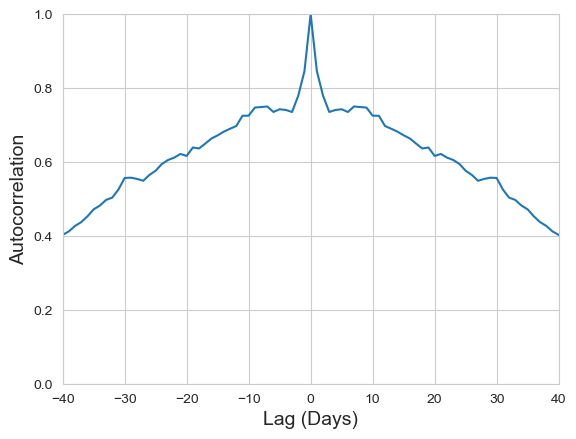

In [17]:
# Calculate the autocorrelation at all lags and plot it
# Is it symmetric about 0 lag?  Should it be? (hint: the answer is yes)
tseries1=tseries-mean
half=int(len(tseries)/2)
lags=np.arange(-1*half,half,1.)
#print(len(tseries1))
#print(len(lags))
#print(len(np.correlate(tseries1,tseries1,mode='same')))
autocorrelation_function=np.correlate(tseries1,tseries1,mode='same')/((n-np.abs(lags))*sigma**2)  ##Eq. 67 divided by variance
plt.plot(range(-1*half,half),autocorrelation_function)
plt.xlim([-40,40]);
plt.ylim([0.0,1.0]);
plt.xlabel('Lag (Days)',fontsize=14);
plt.ylabel('Autocorrelation',fontsize=14);

As the lag is varied from -40 to 0, it is generally increasing, except for a brief phase where the lag is between about -7 and -5 where it decreases before increasing sharply approaching zero. At zero, the neighboring values are equal, resulting in an autocorrelation value of 1. The autocorrelation behavior for positive values of lag are symmetric with negative values of lag.

In [18]:
## Calculate the effective sample size (N*) for this data 
## Compare your estimate of the number of independent samples (N*) with the number of samples 
## in your original data (N)
N=len(tseries)
print('# samples, N: ',N)
print('lag-1 autocorrelation: ',round(alpha,2))
print('#independent samples, N*: ',round((1-np.abs(alpha))/(1+np.abs(alpha))*N,0)) ## Chapter 2 Barnes Eq. 88
## Note that the value of the autocorrelation used in Eq. 88 should be the absolute value otherwise
## if alpha is negative you end up with more independent samples than original samples

# samples, N:  366
lag-1 autocorrelation:  0.85
#independent samples, N*:  31.0


Due to the high memory retained in temperature data, the lag-1 autocorrelation is low and many of the samples are considered dependent. This reduces our sample size by about 91.5%.

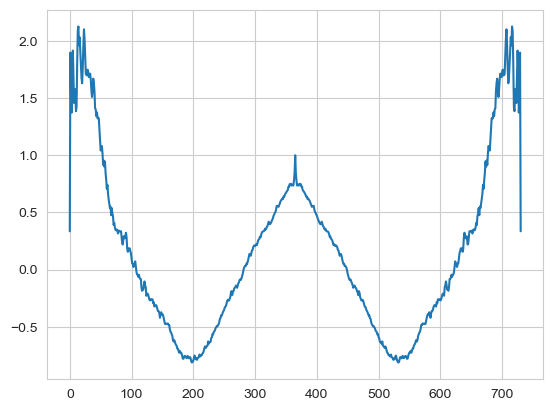

In [19]:
#### EXTRA

## Unsolved mystery of ATOC5860 -- If you want to plot the full autocorrrelation (i.e., vs. all lags)
## You end up with values greater than 1.  But the autocorrelation should be between -1 and 1 (??)

lags_full=np.arange(-n+1,n);
foo=np.correlate(tseries1,tseries1,mode='full')/((n-np.abs(lags_full))*sigma**2);
plt.plot(foo);

## Potential solution??
## Autocorrelation maybe needs to use variance from only the part of the data that are being used?
## Look at Wilks page 58.

### Now with wind speed:

minimum data value:  0.0
maximum data value:  30.6


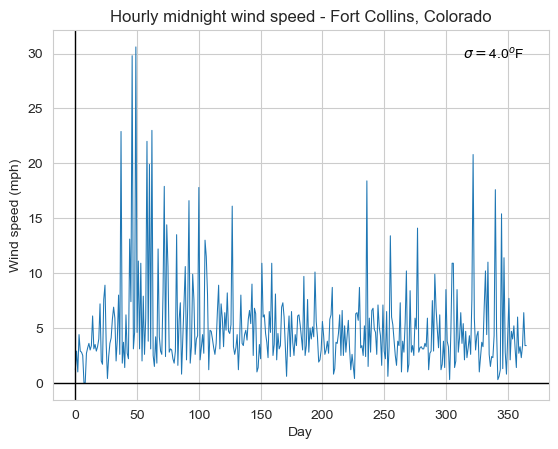

In [4]:
## Plot midnight wind speed data for Fort Collins, Colorado
X=data['wind_mph']
X_daily=X[::24] ## sample the hourly data every 24 hours
print('minimum data value: ',X_daily.min())
print('maximum data value: ',X_daily.max())
xindex = (np.arange(0,np.size(X),1))/24.
xindex_daily=xindex[::24] ## sample the index every 24 hours
plt.plot(xindex_daily, X_daily, linewidth = 0.75)
v = np.std(X_daily) #std dev
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v)) + '$^o$F', ha='right', transform=plt.gca().transAxes, color = 'k')
ymin, ymax = plt.ylim();
xmin, xmax = plt.xlim();
lines = plt.plot((xmin, xmax),(0, 0),(0, 0),(ymin, ymax));
plt.setp(lines,color='black', linewidth=1);
plt.ylim((ymin, ymax));
plt.xlim((xmin, xmax));
plt.ylabel('Wind speed (mph)');
plt.xlabel('Day');
plt.title('Hourly midnight wind speed - Fort Collins, Colorado');

In [5]:
#Find the lag-one autocorrelation (AR1)
tseries=X_daily
sigma=np.std(tseries) 
mean=np.mean(tseries) 
n=len(tseries)        
lag=1                  ## warning: you cannot change this to be a negative lag. 
                       
## remove the mean
tseries1=tseries-mean

##Create two timeseries of the data at t=t1 and t=t2
t1_m=tseries1.iloc[0:-1*lag] # excludes last one,two,etc elements for incorporating lag
t2_m=tseries1.iloc[lag:] # excludes first one,two,etc elements ''
#print(t1_m.shape)
#print(t2_m.shape)

#Method #1
#Calculate the autocorrelation using numpy correlate lagN
lagNauto_np=np.correlate(t1_m,t2_m,mode='valid')/(n-lag)/(sigma**2)
print('lag',lag,'autocorrelation np.correlate:',round(lagNauto_np[0],3))

#Method #2 - direct calculation
#Calculate the autocorrelation using numpy dot
## (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
lagNauto=np.dot(t1_m,t2_m)/(n-lag)/sigma**2 ## Barnes Chapter 2 Eq. 68 divided by the variance
print('lag',lag,'autocorrelation direct calc:',round(lagNauto,3))

if lag==1: alpha=lagNauto

lag 1 autocorrelation np.correlate: -0.045
lag 1 autocorrelation direct calc: -0.045


Note that the lag-1 autocorrelation is approximately -0.045. We can conclude that a negligible memory is retained in wind speeds sampled every midnight.

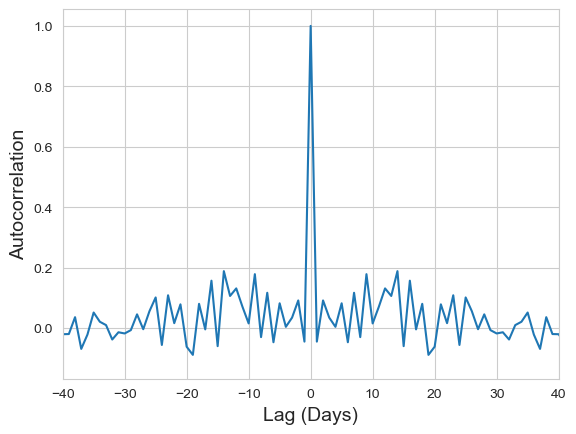

In [7]:
# Calculate the autocorrelation at all lags and plot it
tseries1=tseries-mean
half=int(len(tseries)/2)
lags=np.arange(-1*half,half,1.)
#print(len(tseries1))
#print(len(lags))
#print(len(np.correlate(tseries1,tseries1,mode='same')))
autocorrelation_function=np.correlate(tseries1,tseries1,mode='same')/((n-np.abs(lags))*sigma**2)  ##Eq. 67 divided by variance
plt.plot(range(-1*half,half),autocorrelation_function)
plt.xlim([-40,40]);
# plt.ylim([0.0,1.0]);
plt.xlabel('Lag (Days)',fontsize=14);
plt.ylabel('Autocorrelation',fontsize=14);

As the lag is varied from -40 to 0, it is slightly increasing overall with some variability. At zero, the neighboring values are equal, resulting in an autocorrelation value of 1. The autocorrelation behavior for positive values of lag are symmetric with negative values of lag.

In [8]:
## Calculate the effective sample size (N*) for this data 
## Compare your estimate of the number of independent samples (N*) with the number of samples 
## in your original data (N)
N=len(tseries)
print('# samples, N: ',N)
print('lag-1 autocorrelation: ',round(alpha,2))
print('#independent samples, N*: ',round((1-np.abs(alpha))/(1+np.abs(alpha))*N,0)) ## Chapter 2 Barnes Eq. 88
## Note that the value of the autocorrelation used in Eq. 88 should be the absolute value otherwise
## if alpha is negative you end up with more independent samples than original samples

# samples, N:  366
lag-1 autocorrelation:  -0.04
#independent samples, N*:  335.0


Due to the negligible memory in 24h wind speed data, the lag-1 autocorrelation is low and the samples can be considered independent.

### Now with a 6 hour temporal sampling frequency:

minimum data value:  0.0
maximum data value:  34.8


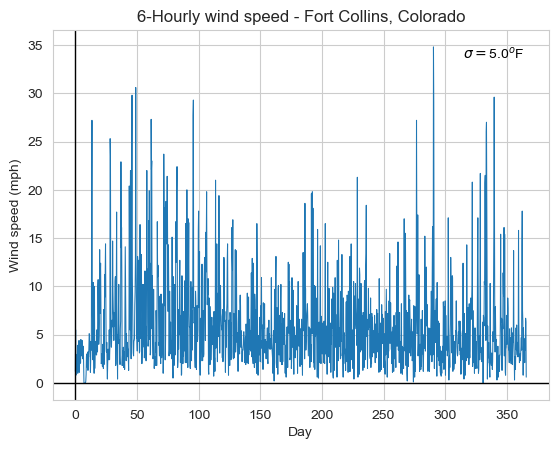

In [9]:
## Plot 6-hourly wind speed data for Fort Collins, Colorado
X=data['wind_mph']
X_daily=X[::6] ## sample the hourly data every 6 hours
print('minimum data value: ',X_daily.min())
print('maximum data value: ',X_daily.max())
xindex = (np.arange(0,np.size(X),1))/24.
xindex_daily=xindex[::6] ## sample the index every 24 hours
plt.plot(xindex_daily, X_daily, linewidth = 0.75)
v = np.std(X_daily) #std dev
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v)) + '$^o$F', ha='right', transform=plt.gca().transAxes, color = 'k')
ymin, ymax = plt.ylim();
xmin, xmax = plt.xlim();
lines = plt.plot((xmin, xmax),(0, 0),(0, 0),(ymin, ymax));
plt.setp(lines,color='black', linewidth=1);
plt.ylim((ymin, ymax));
plt.xlim((xmin, xmax));
plt.ylabel('Wind speed (mph)');
plt.xlabel('Day');
plt.title('6-Hourly wind speed - Fort Collins, Colorado');

In [10]:
#Find the lag-one autocorrelation (AR1)
tseries=X_daily
sigma=np.std(tseries) 
mean=np.mean(tseries) 
n=len(tseries)        
lag=1                  ## warning: you cannot change this to be a negative lag. 
                       
## remove the mean
tseries1=tseries-mean

##Create two timeseries of the data at t=t1 and t=t2
t1_m=tseries1.iloc[0:-1*lag] # excludes last one,two,etc elements for incorporating lag
t2_m=tseries1.iloc[lag:] # excludes first one,two,etc elements ''
#print(t1_m.shape)
#print(t2_m.shape)

#Method #1
#Calculate the autocorrelation using numpy correlate lagN
lagNauto_np=np.correlate(t1_m,t2_m,mode='valid')/(n-lag)/(sigma**2)
print('lag',lag,'autocorrelation np.correlate:',round(lagNauto_np[0],3))

#Method #2 - direct calculation
#Calculate the autocorrelation using numpy dot
## (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
lagNauto=np.dot(t1_m,t2_m)/(n-lag)/sigma**2 ## Barnes Chapter 2 Eq. 68 divided by the variance
print('lag',lag,'autocorrelation direct calc:',round(lagNauto,3))

if lag==1: alpha=lagNauto

lag 1 autocorrelation np.correlate: 0.365
lag 1 autocorrelation direct calc: 0.365


Note that the lag-1 autocorrelation is approximately 0.365. We can conclude that a low memory is retained in wind speeds sampled every 6 hours, though it is higher than when sampling every 24 hours.

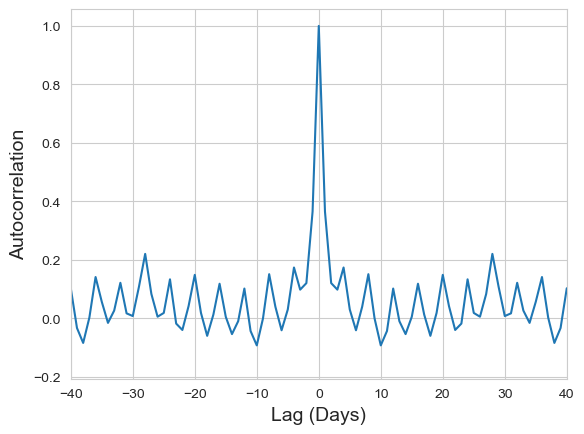

In [11]:
# Calculate the autocorrelation at all lags and plot it
tseries1=tseries-mean
half=int(len(tseries)/2)
lags=np.arange(-1*half,half,1.)
#print(len(tseries1))
#print(len(lags))
#print(len(np.correlate(tseries1,tseries1,mode='same')))
autocorrelation_function=np.correlate(tseries1,tseries1,mode='same')/((n-np.abs(lags))*sigma**2)  ##Eq. 67 divided by variance
plt.plot(range(-1*half,half),autocorrelation_function)
plt.xlim([-40,40]);
# plt.ylim([0.0,1.0]);
plt.xlabel('Lag (Days)',fontsize=14);
plt.ylabel('Autocorrelation',fontsize=14);

As the lag is varied from -40 to 0, it fluctuates overall around 0. At zero, the neighboring values are equal, resulting in an autocorrelation value of 1. The autocorrelation behavior for positive values of lag are symmetric with negative values of lag.

In [13]:
## Calculate the effective sample size (N*) for this data 
N=len(tseries)
print('# samples, N: ',N)
print('lag-1 autocorrelation: ',round(alpha,2))
print('#independent samples, N*: ',round((1-np.abs(alpha))/(1+np.abs(alpha))*N,0)) ## Chapter 2 Barnes Eq. 88

# samples, N:  1464
lag-1 autocorrelation:  0.37
#independent samples, N*:  681.0


Due to the low/moderate memory in wind speed data, the lag-1 autocorrelation is moderate and many of the samples can be considered independent. However, since 13.69% of the variance can be explained through lag-1 autocorrelation, many of the samples can be considered dependent, which causes us to lose about 53.48% of our samples. With wind, this may be due to a weather system moving into the area lasting several hours, for example. This results in a higher autocorrelation than wind measurements taken every 24h, which is associated with a very low autocorrelation. 